<a href="https://colab.research.google.com/github/anubhavtm/My-Visual-Studio-Files/blob/master/Convolutional_Neural_Networks_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
    import numpy as np
    import matplotlib.pyplot as plt
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from keras.layers import Flatten
    from keras.layers.convolutional import Conv2D
    from keras.layers.convolutional import MaxPooling2D
    from keras.utils.np_utils import to_categorical
    from keras.layers import Dropout
    from keras.models import Model
    import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
     
print(X_train.shape)
print(X_test.shape)

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


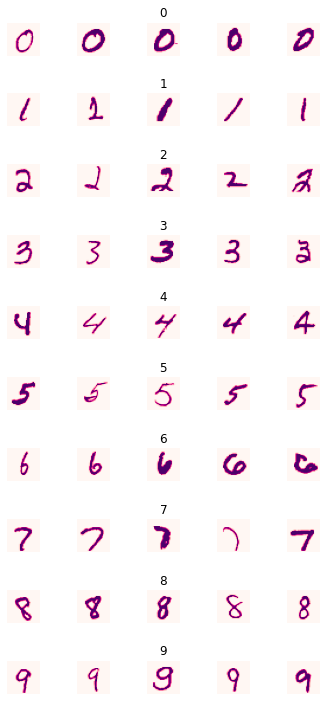

In [0]:
    num_of_samples=[]
     
    cols = 5
    num_classes = 10
     
    fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
    fig.tight_layout()
     
    for i in range(cols):
        for j in range(num_classes):
          x_selected = X_train[y_train == j]
          axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('RdPu'))
          axs[j][i].axis("off")
          if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


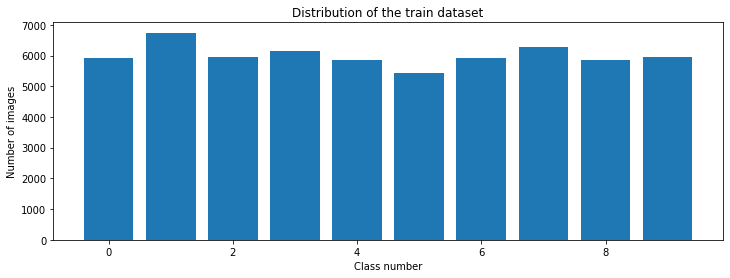

In [0]:

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
     
X_train = X_train/255
X_test = X_test/255

In [0]:
#define lenet
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())
  
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss= 'categorical_crossentropy',metrics=['accuracy'])
  return model 

In [0]:
model = leNet_model()

In [0]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [0]:
h = model.fit(x= X_train, y= y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.2274 - accuracy: 0.9281 - val_loss: 0.0487 - val_accuracy: 0.9847
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0347 - val_accuracy: 0.9912
Epoch 4/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0336 - val_accuracy: 0.9902
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 7/10
54000/54000 [==============================] - 2s 35us/ste

Text(0.5, 0, 'epoch')

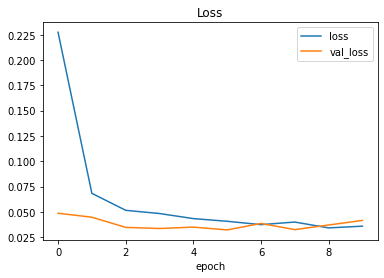

In [0]:
history =h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

<class 'list'>
Test score: 0.038474641769165756
Test accuracy: 0.9894000291824341


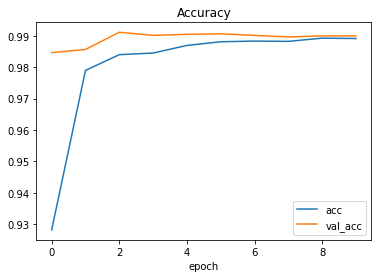

In [0]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])
 

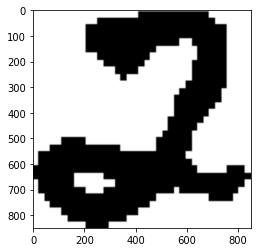

In [0]:
    import requests
    from PIL import Image
     
    url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
    # url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
    response = requests.get(url, stream=True)
    img = Image.open(response.raw)
    plt.imshow(img, cmap=plt.get_cmap('RdPu'))

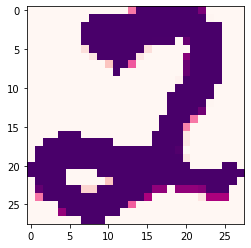

In [0]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('RdPu'))

In [0]:
img = img/255
img = img.reshape(1, 28,28,1)

In [0]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


In [0]:
score = model.evaluate(X_test, y_test, verbose=0)   # Testing the model on test data
print(type(score))
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
[0.038474641769165756, 0.9894000291824341]
Test score: 0.038474641769165756
Test accuracy: 0.9894000291824341


In [0]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

In [0]:
visualOutput1 , visualOutput2 = layer1.predict(img), layer2.predict(img)

In [0]:
print(visualOutput1.shape)
print(visualOutput2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


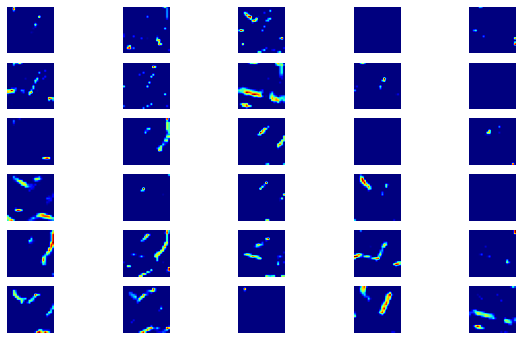

In [0]:
plt.figure(figsize=(10,6))
for i in range (30):
  plt.subplot(6,5,i+1)
  plt.imshow(visualOutput1[0,:,:,i],cmap=plt.get_cmap('jet')) #cmap jet
  plt.axis("off")

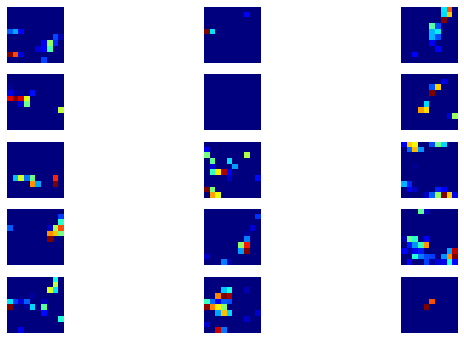

In [0]:
plt.figure(figsize=(10,6))
for i in range (15):
  plt.subplot(5,3,i+1)
  plt.imshow(visualOutput2[0,:,:,i],cmap=plt.get_cmap('jet'))
  plt.axis("off")